In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 개짐 방지
from matplotlib import font_manager, rc
import matplotlib
font_path = "C:/Windows/Fonts/malgun.ttf" # 맑은 고딕...
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family=font_name)

# 1. 데이터 확인 

In [2]:
df = pd.read_csv("seoul.csv", skiprows=6) # 첫 6행 건너뛰기
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41814 entries, 0 to 41813
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41814 non-null  object 
 1   지점       41814 non-null  int64  
 2   평균기온(℃)  41058 non-null  float64
 3   최저기온(℃)  41055 non-null  float64
 4   최고기온(℃)  41055 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
df.dtypes

날짜          object
지점           int64
평균기온(℃)    float64
최저기온(℃)    float64
최고기온(℃)    float64
dtype: object

In [6]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=41814, step=1)

In [8]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41814.0,41058.000000,41055.000000,41055.000000
mean,108.0,11.761800,7.469443,16.766905
std,0.0,10.653653,10.879782,10.971288
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [9]:
df.shape

(41814, 5)

## 날짜 이상데이터 제거 

In [14]:
# 문자열 타입이니까 str 메소드 
df['날짜'] = df['날짜'].str.strip()
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 결측치 확인

In [17]:
df.isna().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

In [18]:
df.isna()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
41809,False,False,False,False,False
41810,False,False,False,False,False
41811,False,False,False,False,False
41812,False,False,False,False,False


In [19]:
# 최저기온이 결측치인 행들만 
df[df['최저기온(℃)'].isna()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


In [20]:
df[df['최고기온(℃)'].isna()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


- 1950년대 625전쟁으로 당시 데이터가 수집되지 않은 것으로 추정 
    - 1950/06/25 ~ 1953/07/27 전쟁 기간 

In [21]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [22]:
df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


# 2. 데이터 분석

## 서울이 가장 더웠던 날

- 서울 최고 기온이 가장 높았던 날

In [25]:
df['최고기온'].max()

39.6

In [26]:
df['최고기온'].idxmax()
# 최고기온이 가장 높았던 데이터의 인덱스

40051

In [27]:
df.loc[40051]

날짜      2018-08-01
지점             108
평균기온          33.6
최저기온          27.8
최고기온          39.6
Name: 40051, dtype: object

In [28]:
df.sort_values(by='최고기온', ascending=False)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
11636,1939-08-10,108,30.1,24.5,38.2
31276,1994-07-23,108,32.6,28.0,38.2
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


## 내 생일의 기온 변화

In [32]:
df[df['날짜'].str.endswith('11-04')]

,날짜,지점,평균기온,최저기온,최고기온
34,1907-11-04,108,5.9,-1.0,13.6
400,1908-11-04,108,13.9,6.6,18.6
765,1909-11-04,108,1.7,-2.7,8.9
1130,1910-11-04,108,3.6,-4.1,12.0
1495,1911-11-04,108,7.4,1.1,14.2
...,...,...,...,...,...
40146,2018-11-04,108,11.6,5.3,19.4
40511,2019-11-04,108,13.8,9.2,20.3
40877,2020-11-04,108,4.9,0.2,10.8
41242,2021-11-04,108,12.1,8.4,16.3


In [33]:
# 생일 데이터 추출 ver2
ndf = df.copy() # 복사본 

# 날짜 데이터타입을 datatime 으로 바꿔서 
ndf['date'] = pd.to_datetime(df['날짜'])
ndf.head()

,날짜,지점,평균기온,최저기온,최고기온,date
0,1907-10-01,108,13.5,7.9,20.7,1907-10-01
1,1907-10-02,108,16.2,7.9,22.0,1907-10-02
2,1907-10-03,108,16.2,13.1,21.3,1907-10-03
3,1907-10-04,108,16.5,11.2,22.0,1907-10-04
4,1907-10-05,108,17.6,10.9,25.4,1907-10-05


In [35]:
ndf.dtypes

날짜              object
지점               int64
평균기온           float64
최저기온           float64
최고기온           float64
date    datetime64[ns]
dtype: object

In [39]:
# 칼럼 전체에서 : dt
ndf.date.dt.month

0        10
1        10
2        10
3        10
4        10
         ..
41809     5
41810     5
41811     5
41812     5
41813     5
Name: date, Length: 41814, dtype: int64

In [41]:
# 월정보
ndf.iloc[0,-1].month

10

In [42]:
ndf.iloc[0,-1].day

1

In [43]:
ndf.iloc[0,-1].year

1907

In [52]:
birthday_df = ndf[(ndf.date.dt.day == 4) & (ndf.date.dt.month == 11)]
# & 말고 and 쓰면 오류 ! 

birthday_df.head()

,날짜,지점,평균기온,최저기온,최고기온,date
34,1907-11-04,108,5.9,-1.0,13.6,1907-11-04
400,1908-11-04,108,13.9,6.6,18.6,1908-11-04
765,1909-11-04,108,1.7,-2.7,8.9,1909-11-04
1130,1910-11-04,108,3.6,-4.1,12.0,1910-11-04
1495,1911-11-04,108,7.4,1.1,14.2,1911-11-04


# 3. 시각화

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


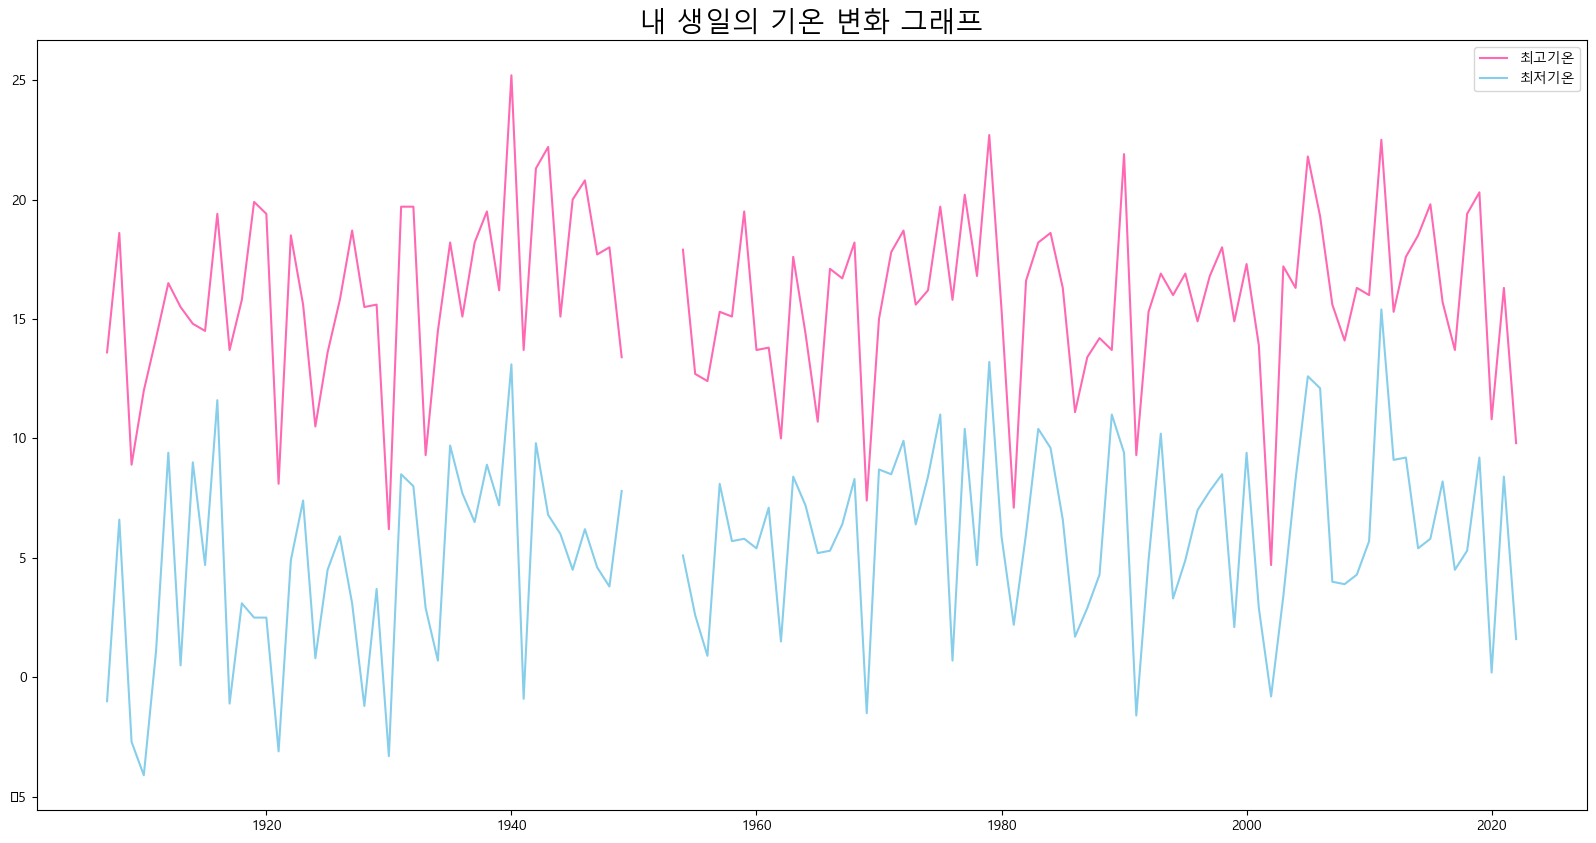

In [54]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1) # 1행 1열의 첫번째 칸

ax.plot(birthday_df['date'].dt.year, birthday_df['최고기온'], 'hotpink', label='최고기온')
ax.plot(birthday_df['date'].dt.year, birthday_df['최저기온'], 'skyblue', label='최저기온')

ax.legend()
ax.set_title("내 생일의 기온 변화 그래프", size=20)

plt.show()

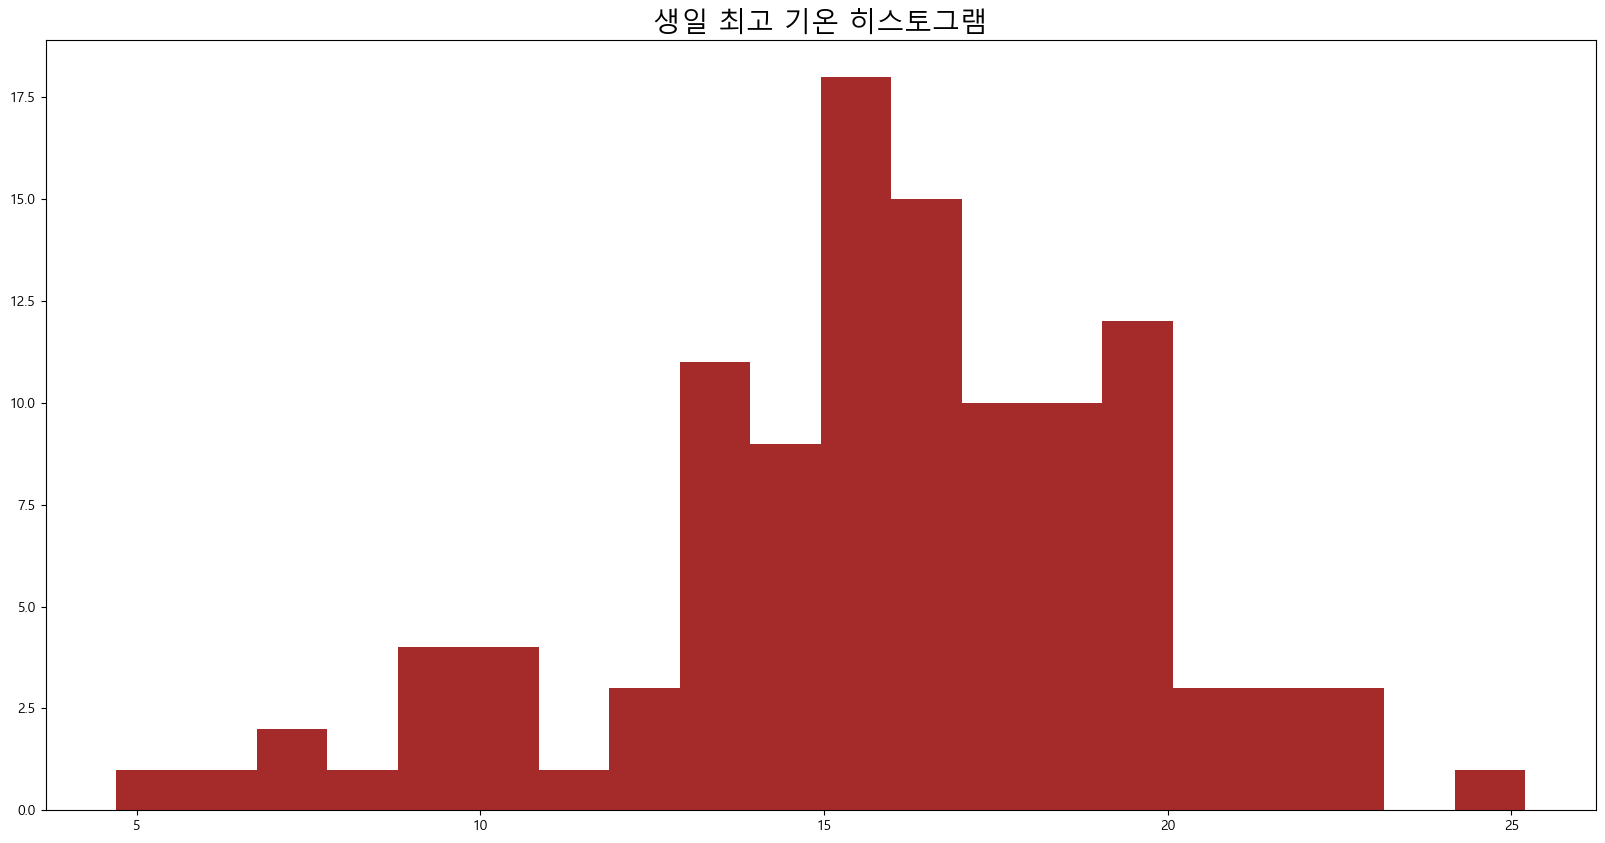

In [56]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

# 히스토그램 디폴트 "bins=10"
ax.hist(birthday_df.최고기온, color='brown', bins=20)
ax.set_title("생일 최고 기온 히스토그램", size=20)

plt.show()

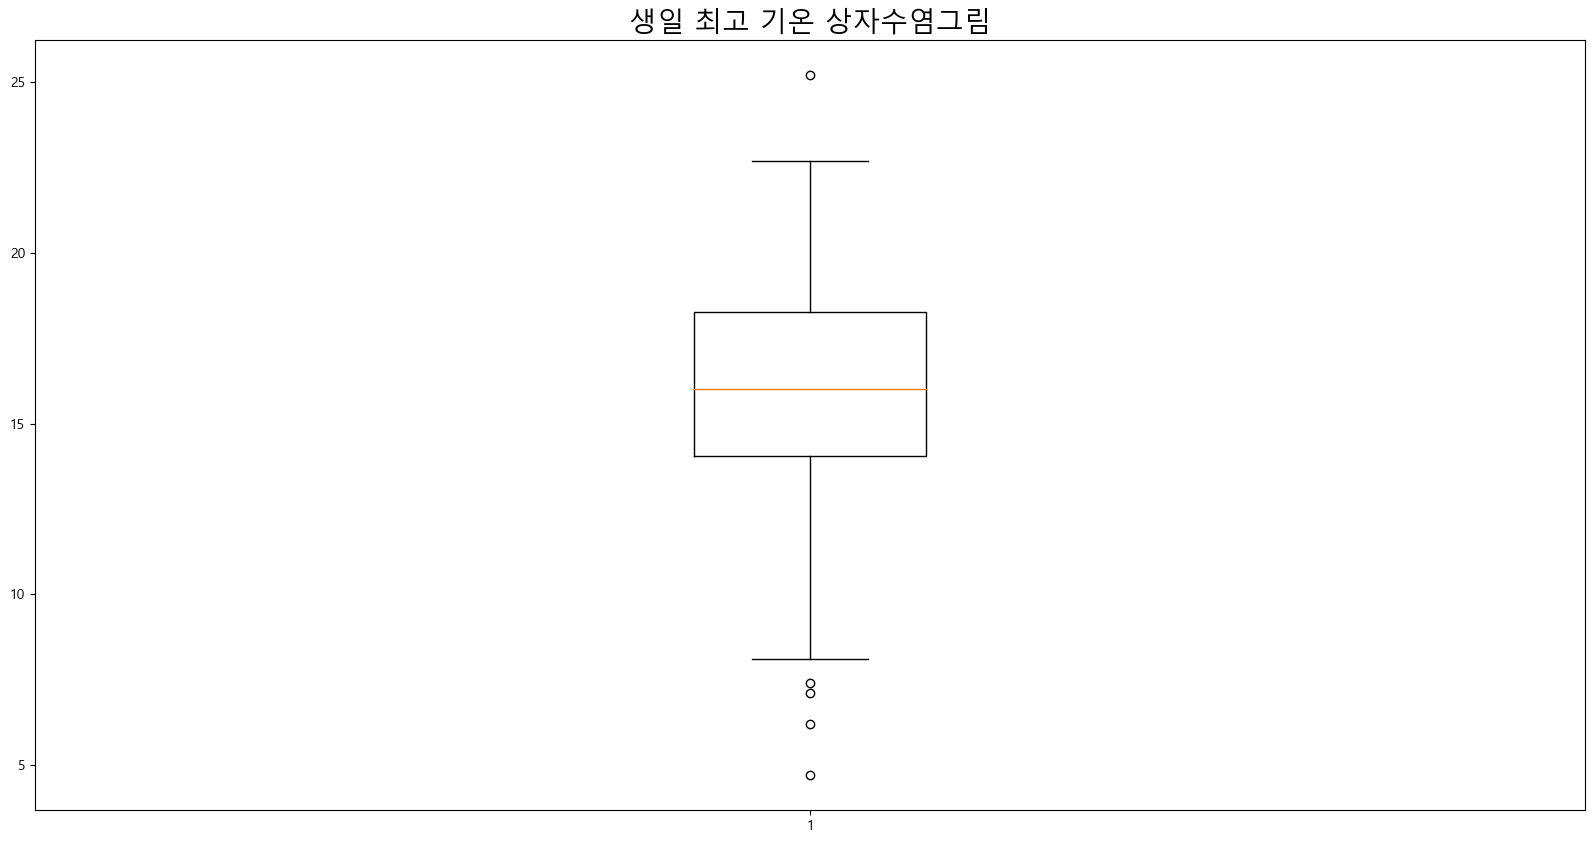

In [57]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

ax.boxplot(birthday_df.최고기온.dropna())
ax.set_title("생일 최고 기온 상자수염그림", size=20)
plt.show()

박스플랏은 알아서 최대값 최소값, 그 외의 이상치들을 정해주는데, 
- q3 - q1 (inter-quantile range: IQR) --> 1.5 IQR 까지는 범위까지는 봐준다. 
- 하지만 그 이상을 벗어나게 되면 극단값으로 처리해줌. 
- 3사분위 + 1.5 IQR / 1사분위 - 1.5 IQR 까지는 인정 